<a href="https://colab.research.google.com/github/AbiramiSridharan/-Stock-Market-and-Company-Financial-Data-Analytics-and-Prediction-using-Time-series-ML-models/blob/main/IT_Software_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import express as px
from fbprophet import Prophet
from matplotlib.ticker import ScalarFormatter
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from fbprophet.diagnostics import cross_validation
import math
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

# **Basic Operations on dataset**





*   Loading Data into dataframe df
*   Changing Date column datatype to datetime



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML_Project/IT-Software_Quarters.csv')
ITSoftwareGeneral=pd.read_csv('/content/drive/MyDrive/ML_Project/IT-Software_General.csv' ,encoding= 'unicode_escape')
df.head(10)
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date                 datetime64[ns]
Sales                       float64
Expenses                    float64
Other Income                float64
Depreciation                float64
Interest                     object
Profit before tax           float64
Tax                         float64
Net profit                  float64
Operating Profit            float64
Company Name                 object
dtype: object

In [ ]:
ITSoftwareGeneral.dtypes

Name                 object
CMP Rs.             float64
P/E                 float64
Mar Cap Rs.Cr.      float64
Div Yld %           float64
NP Qtr Rs.Cr.       float64
Sales Qtr Rs.Cr.    float64
Qtr Sales Var %     float64
ROCE %              float64
Debt / Eq           float64
ROE %               float64
OPM %               float64
Qtr Profit Var %    float64
Sales Rs.Cr.        float64
Debt Rs.Cr.         float64
Sales growth %      float64
dtype: object

In [ ]:
df.shape

(50, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               50 non-null     datetime64[ns]
 1   Sales              50 non-null     float64       
 2   Expenses           50 non-null     float64       
 3   Other Income       50 non-null     float64       
 4   Depreciation       50 non-null     float64       
 5   Interest           50 non-null     object        
 6   Profit before tax  50 non-null     float64       
 7   Tax                50 non-null     float64       
 8   Net profit         50 non-null     float64       
 9   Operating Profit   50 non-null     float64       
 10  Company Name       50 non-null     object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 4.4+ KB


In [ ]:
df.describe()

,Sales,Expenses,Other Income,Depreciation,Profit before tax,Tax,Net profit,Operating Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,21085.454000,15826.482000,517.662000,3635.808000,4984.256000,1210.734000,3765.922000,5258.972000
std,10519.073141,7280.063946,366.696018,5914.442889,3294.624994,856.064841,2475.818388,3269.692045
min,8653.000000,7234.300000,-304.000000,270.400000,965.600000,226.500000,803.900000,1130.300000
25%,15068.800000,11742.200000,204.150000,538.000000,3074.000000,584.000000,2341.475000,3134.575000
50%,17988.500000,13372.000000,562.350000,828.500000,3800.150000,771.300000,2956.000000,4589.000000
75%,24343.750000,17579.250000,724.750000,1085.750000,6524.750000,1883.250000,4748.000000,6842.500000
max,43705.000000,30904.000000,1675.000000,16245.400000,12527.000000,3245.000000,9246.000000,12801.000000


In [ ]:
df['Company Name'].unique()

array(['HCL Technologies', 'Infosys', 'TCS', 'Tech Mahindra', 'Wipro'],
      dtype=object)

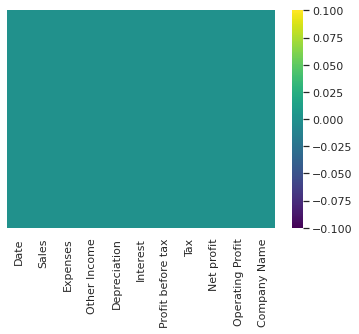

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [ ]:
df.isnull().sum()

Date                 0
Sales                0
Expenses             0
Other Income         0
Depreciation         0
Interest             0
Profit before tax    0
Tax                  0
Net profit           0
Operating Profit     0
Company Name         0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.columns

Index(['Date', 'Sales', 'Expenses', 'Other Income', 'Depreciation', 'Interest',
       'Profit before tax', 'Tax', 'Net profit', 'Operating Profit',
       'Company Name'],
      dtype='object')

# **IT Software Basic Analytics**

Text(0.5, 0.98, 'Market Capitalization Percentage Companywise')

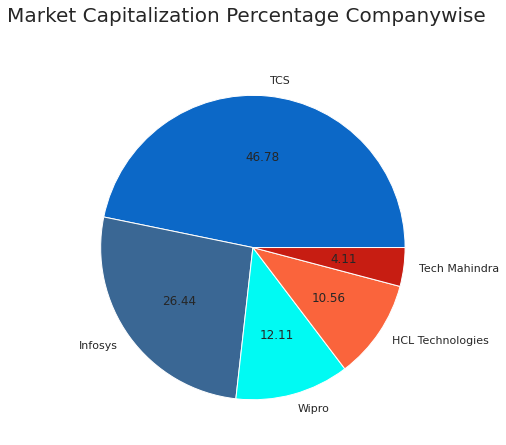

In [ ]:
fig=plt.figure(figsize=(7,7))
plt.pie(x=ITSoftwareGeneral['Mar Cap\xa0Rs.Cr.'], labels=ITSoftwareGeneral['Name'], autopct='%.2f',radius=1);
plt.suptitle("Market Capitalization Percentage Companywise",size=20)

In [ ]:
ITSoftwareGeneral.columns


Index(['Name', 'CMP Rs.', 'P/E', 'Mar Cap Rs.Cr.', 'Div Yld %',
       'NP Qtr Rs.Cr.', 'Sales Qtr Rs.Cr.', 'Qtr Sales Var %', 'ROCE %',
       'Debt / Eq', 'ROE %', 'OPM %', 'Qtr Profit Var %', 'Sales Rs.Cr.',
       'Debt Rs.Cr.', 'Sales growth %'],
      dtype='object')

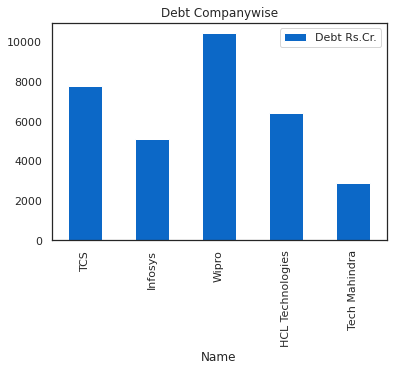

In [ ]:
df1=ITSoftwareGeneral[['Debt\xa0Rs.Cr.','Name']].set_index('Name')
df1.plot(kind='bar',title='Debt Companywise')

In [ ]:
fig = px.bar(ITSoftwareGeneral,x='Name',y='Sales growth\xa0%',title='Sales growth companywise',color=['green','goldenrod','red','blue','brown'])
fig.show()

Text(0.5, 0.98, 'Dividend Yield Percentage Companywise')

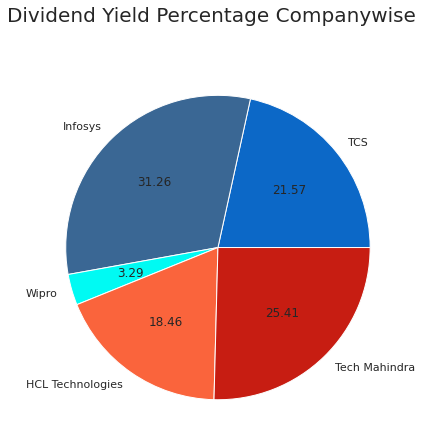

In [ ]:
fig=plt.figure(figsize=(7,7))
plt.pie(x=ITSoftwareGeneral.iloc[:,4],labels=ITSoftwareGeneral['Name'], autopct='%.2f',radius=1);
plt.suptitle("Dividend Yield Percentage Companywise",size=20)

# **IT Software SALES and NET PROFIT QUARTERLY ANALYSIS AND PREDICTION/Multiple Time Series using FB Prophet** 

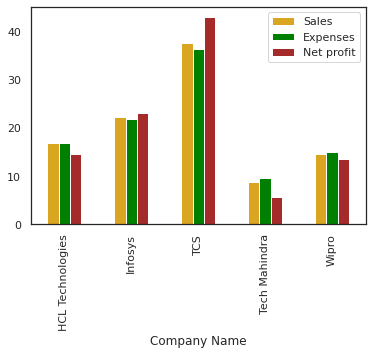

In [ ]:
df1=df[['Sales','Expenses','Net profit','Company Name']].groupby(['Company Name']).sum().transform(lambda x: x/np.sum(x)*100)
df1.plot(kind='bar',color=['goldenrod','green','brown'])

In [ ]:
df.reset_index()
df1=df[['Date','Sales','Expenses','Net profit','Company Name']].rename({'Date':'ds','Sales':'y'},axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               50 non-null     datetime64[ns]
 1   Sales              50 non-null     float64       
 2   Expenses           50 non-null     float64       
 3   Other Income       50 non-null     float64       
 4   Depreciation       50 non-null     float64       
 5   Interest           50 non-null     object        
 6   Profit before tax  50 non-null     float64       
 7   Tax                50 non-null     float64       
 8   Net profit         50 non-null     float64       
 9   Operating Profit   50 non-null     float64       
 10  Company Name       50 non-null     object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 4.4+ KB


In [ ]:
df1.head(5)

,ds,y,Expenses,Net profit,Company Name
0,2018-12-31,15699.0,12067.0,2605.0,HCL Technologies
1,2019-03-31,15990.0,12396.0,2550.0,HCL Technologies
2,2019-06-30,16427.0,12857.0,2230.0,HCL Technologies
3,2019-09-30,17527.0,13268.0,2711.0,HCL Technologies
4,2019-12-31,18135.0,13506.0,2944.0,HCL Technologies


In [ ]:
companies=df1.groupby('Company Name')

**Sales Prediction for Top 5 Companies**

In [ ]:
target=pd.DataFrame()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run pr

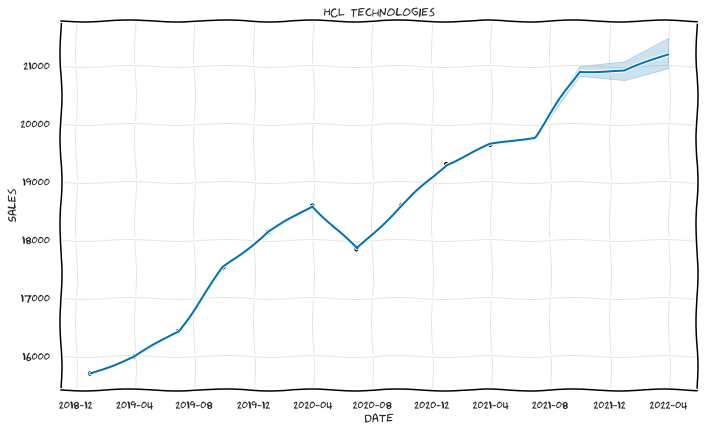

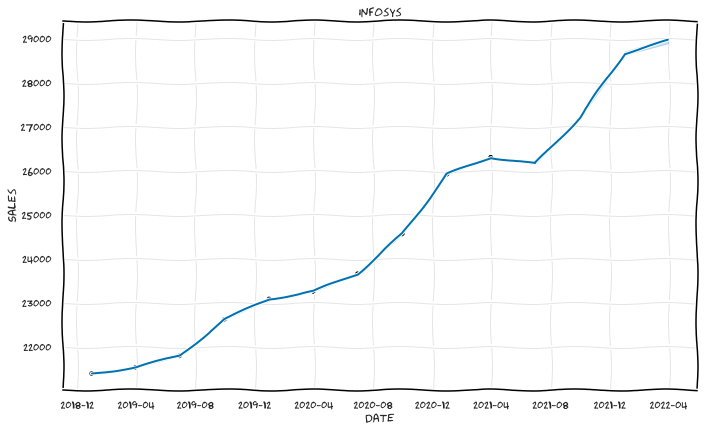

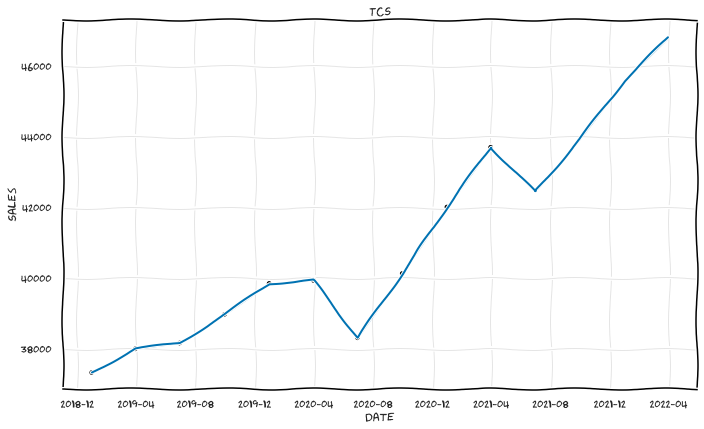

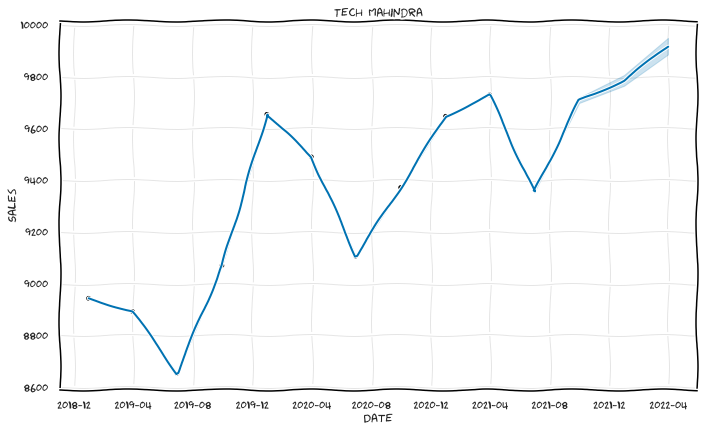

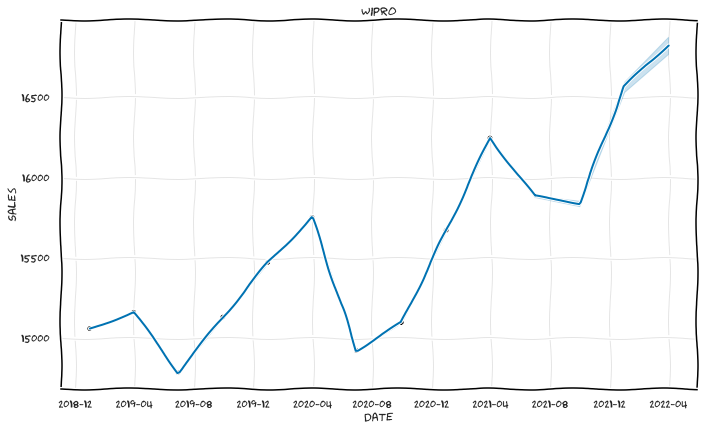

In [ ]:
with plt.xkcd():  
  for company in companies.groups:
    group=companies.get_group(company)
    m=Prophet()
    m.fit(group)
    future=m.make_future_dataframe(periods=4,freq='Q')
    forecast=m.predict(future)
    m.plot(forecast,xlabel="Date",ylabel="Sales")
    plt.title(company)
    forecast=forecast.rename(columns={'yhat':'yhat_'+company})
    target=pd.merge(target,forecast.set_index('ds'),how='outer',left_index=True,right_index=True)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

**Netprofit Prediction for Top 5 Companies**

In [ ]:
df2=df[['Date','Sales','Expenses','Net profit','Company Name']].rename({'Date':'ds','Net profit':'y'},axis='columns')

In [ ]:
companies_np=df2.groupby('Company Name')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


FB Prophet for HCL Technologies
MSE-FB prophet: 203966.94551952937
MAE-FB prophet: 324.2056155172703
RMSE-FB prophet: 451.6269982181417


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


FB Prophet for Infosys
MSE-FB prophet: 1.6161454808061054e-21
MAE-FB prophet: 3.41970007866621e-11
RMSE-FB prophet: 4.0201311928917264e-11


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


FB Prophet for TCS
MSE-FB prophet: 4.052523257019793e-21
MAE-FB prophet: 4.802132025361061e-11
RMSE-FB prophet: 6.365943179937905e-11


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


FB Prophet for Tech Mahindra
MSE-FB prophet: 5.232563609251457e-23
MAE-FB prophet: 5.877609510207549e-12
RMSE-FB prophet: 7.233646113303758e-12
FB Prophet for Wipro
MSE-FB prophet: 2.7313503826500973e-22
MAE-FB prophet: 1.4370016288012267e-11
RMSE-FB prophet: 1.652679758044521e-11


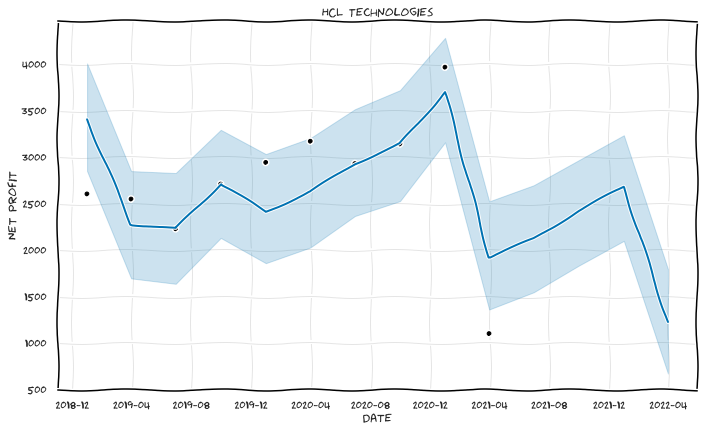

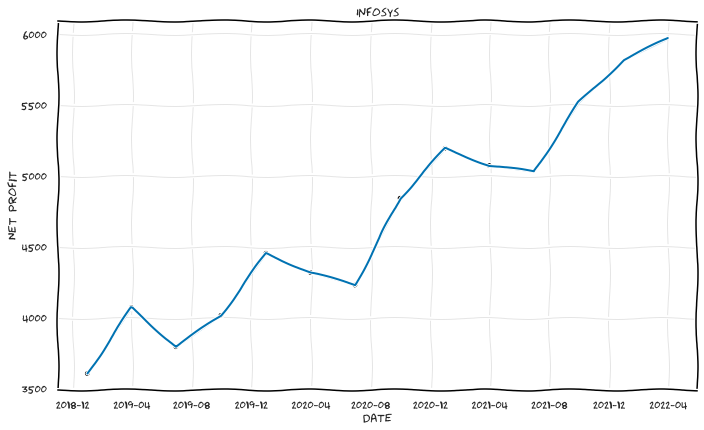

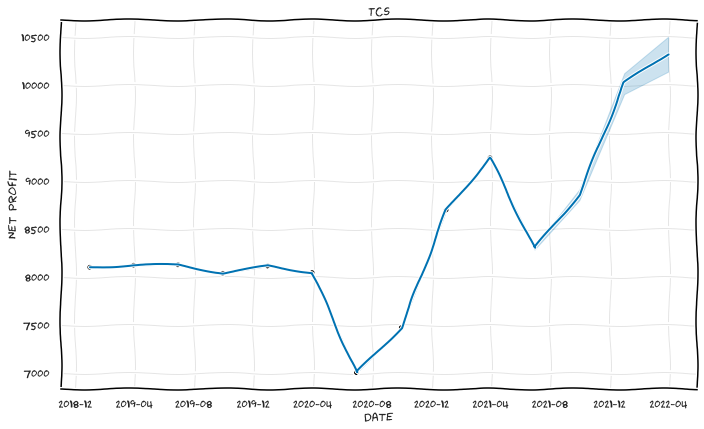

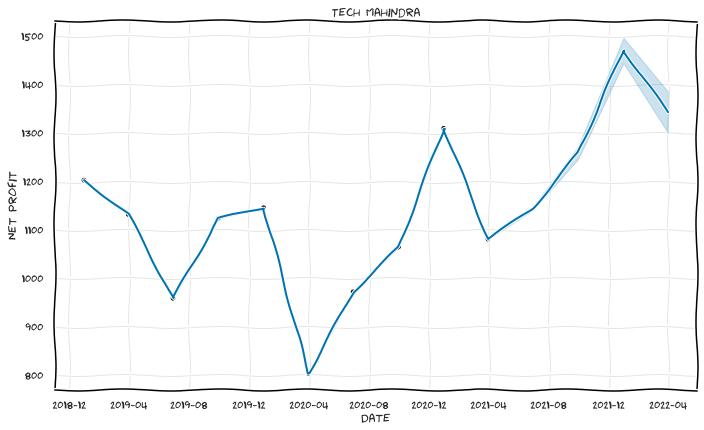

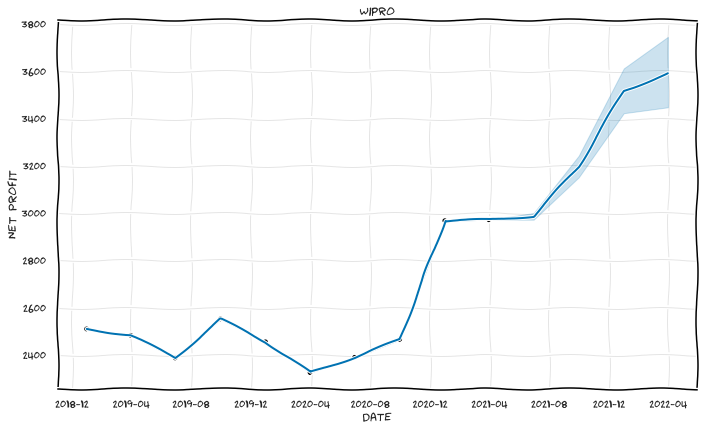

In [ ]:
with plt.xkcd():  
  for company in companies_np.groups:
    group=companies_np.get_group(company)
    m=Prophet()
    m.fit(group)
    future=m.make_future_dataframe(periods=4,freq='Q')
    forecast=m.predict(future)
    m.plot(forecast,xlabel="Date",ylabel="Net Profit")
    plt.title(company)
    forecast=forecast.rename(columns={'yhat':'yhat_'+company})
    target=pd.merge(target,forecast.set_index('ds'),how='outer',left_index=True,right_index=True)
    metric_df = forecast.set_index('ds')[['yhat_'+company]].join(group.set_index('ds').y).reset_index()
    clean_dataset(metric_df)
    print("FB Prophet for "+company)
    msefb = mean_squared_error(metric_df.y, metric_df['yhat_'+company])
    print('MSE-FB prophet: '+str(msefb))
    maefb= mean_absolute_error(metric_df.y, metric_df['yhat_'+company])
    print('MAE-FB prophet: '+str(maefb))
    rmsefb = math.sqrt(mean_squared_error(metric_df.y, metric_df['yhat_'+company]))
    print('RMSE-FB prophet: '+str(rmsefb))

#**AUTO ARIMA** 

Sales prediction Using Auto Arima

In [ ]:
! pip install pmdarima

In [ ]:
get_ipython().run_line_magic('matplotlib','inline')
import warnings
warnings.filterwarnings("ignore")
from pmdarima.arima import auto_arima
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

ImportError: ignored

In [ ]:
def PreparingCompanydata1(source,CompanyName):
  destination=source[source['Company Name']==CompanyName]
  return destination

In [ ]:
HCL_Quarters=PreparingCompanydata1(df,"HCL Technologies")
Infosys_Quarters=PreparingCompanydata1(df,"Infosys")
TCS_Quarters=PreparingCompanydata1(df,"TCS")
Tech_Mahindra_Quarters=PreparingCompanydata1(df,"Tech Mahindra")
Wipro_Quarters=PreparingCompanydata1(df,"Wipro")

In [ ]:
df_HCL=pd.Series(HCL_Quarters['Sales'].values,HCL_Quarters['Date'])
print(df_HCL)

In [ ]:
len1=int(df_HCL.size * 0.75)
train = df_HCL[:len1] 
test = df_HCL[-(df_HCL.size-len1):]
plt.plot(train)
plt.plot(test)
train

In [ ]:

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df_HCL)

In [ ]:
stepwise_fit = auto_arima(df_HCL, trace=True,suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(1,0,0))
model=model.fit()
model.summary()

In [ ]:
start=train.size
end=train.size+(test.size-1)
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)
print(pred)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

In [ ]:
test.mean()

In [ ]:
dates=pd.date_range(start = '2021-06-30', end = '2022-03-31', freq = 'Q')
dates

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(A_pred,label='Pred')
plt.legend(loc = 'upper left')
plt.title('',fontsize=20)
plt.show()

**Net profit prdiction Using Auto Arima**

In [ ]:
df_HCL2=pd.Series(HCL_Quarters['Sales'].values,HCL_Quarters['Date'])
print(df_HCL2)

In [ ]:
len1=int(df_HCL2.size * 0.75)
train = df_HCL2[:len1] 
test = df_HCL2[-(df_HCL2.size-len1):]
plt.plot(train)
plt.plot(test)
train

In [ ]:
stepwise_fit = auto_arima(df_HCL2, trace=True,suppress_warnings=True)

In [ ]:
model=ARIMA(train,order=(1,0,0))
model=model.fit()
model.summary()

In [ ]:
start=train.size
end=train.size+(test.size-1)
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

In [ ]:
print(test.mean())
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

# **Shareholding Pattern comparison for Companies - TCS and Infosys**

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/ML_Project/shareholding pattern.csv')

In [ ]:
df1['Date']=pd.to_datetime(df1['Date'])
df1.dtypes
df1.info()
#df.columns

In [ ]:
df1.groupby(['Company']).sum().plot(kind='pie', y='Promoters',shadow = True,colors = ['green', 'red'] )
df1.groupby(['Company']).sum().plot(kind='pie', y='FIIs',shadow = True,colors = ['lightskyblue', 'blue'] )
df1.groupby(['Company']).sum().plot(kind='pie', y='DIIs',shadow = True,colors = ['green', 'gold'] )
df1.groupby(['Company']).sum().plot(kind='pie', y='Government',shadow = True,colors = ['brown', 'gold'] )
df1.groupby(['Company']).sum().plot(kind='pie', y='Public',shadow = True,colors = ['lightskyblue', 'gold'] )

In [ ]:
def PreparingCompanydata(source,CompanyName):
  destination=source[source['Company']==CompanyName]
  return destination

In [ ]:
df1.set_index('Date',inplace=True)

In [ ]:
TCS=PreparingCompanydata(df1,"TCS")
Infosys=PreparingCompanydata(df1,"Infosys")


In [ ]:
ax = TCS.plot.area()

In [ ]:
ax=Infosys.plot.area()